# 1. Read CSV file


The dataset used is the Online Shoppers Purchasing Intention Dataset.

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute will be used as the class label.
Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sn


In [2]:
# Import in local
df = pd.read_csv('D:/ANN/Assignment_Final/ANN_Assignment_Dataset/online_shoppers_intention.csv')

In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# 2. Data exploration


Let's check if the dataset contains Null / NaN values.

In [4]:
print(f"Null: {df.isnull().sum().sum()}")
print(f"Na: {df.isna().sum().sum()}")

Null: 0
Na: 0


We can display DataFrame information such as the type of columns...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Here we can see what we have inside each column: we print the unique values.

In [6]:
for name in df.columns:
  print(f"{name}: {df[name].unique()} \n")

Administrative: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26] 

Administrative_Duration: [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429] 

Informational: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13] 

Informational_Duration: [  0.   120.    16.   ... 547.75 368.25 211.25] 

ProductRelated: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 136

# 3. Visualization


Now we can plot some visualization to better understand our dataset and the distribution of classes.

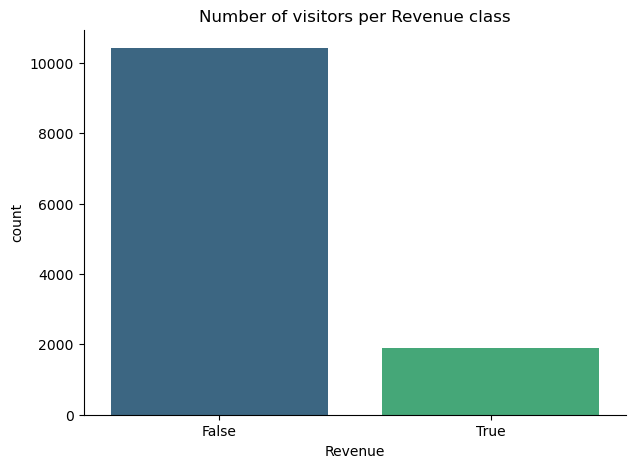

In [7]:
plt.figure(figsize=(7, 5))
sn.countplot(data=df, x="Revenue", palette="viridis")
sn.despine()
plt.title("Number of visitors per Revenue class")
plt.show() 

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


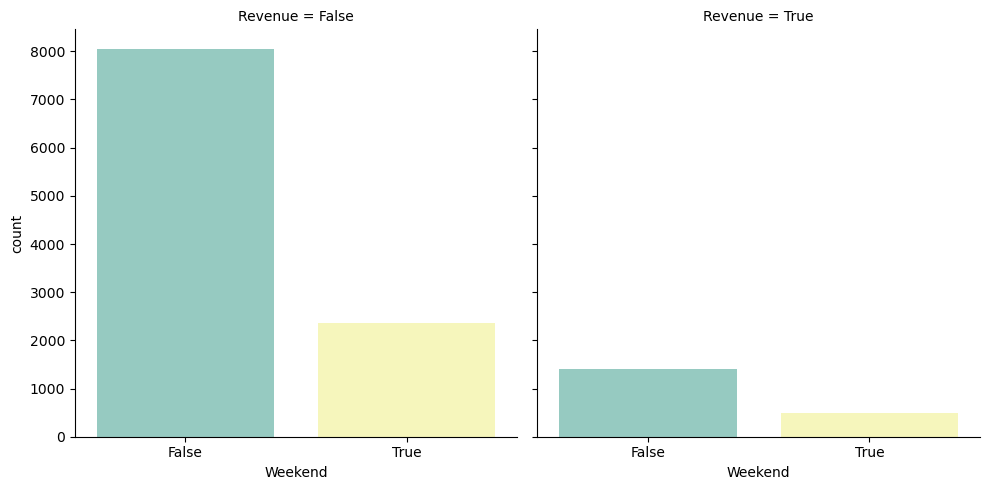

In [8]:
sn.catplot(x="Weekend", col="Revenue", data=df, kind="count", palette="Set3")
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


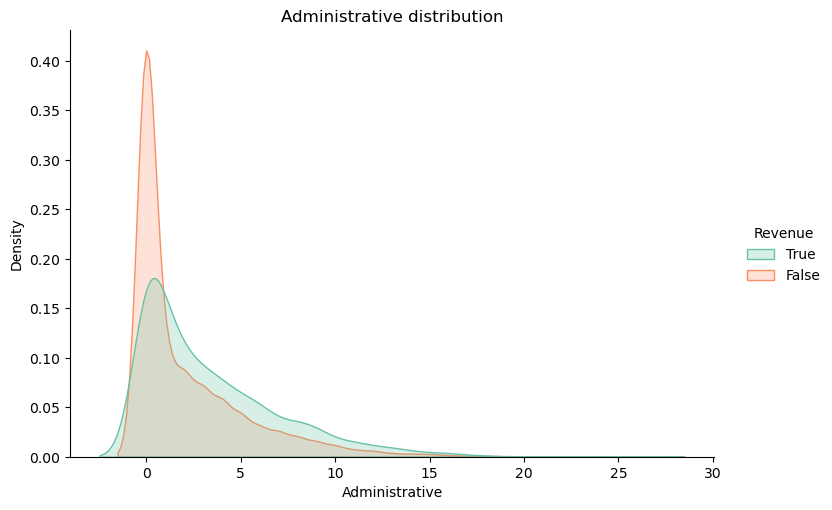

In [9]:
sn.displot(df, x="Administrative", hue="Revenue", kind="kde", fill=True, 
           hue_order=[True, False], aspect=1.5, common_norm=False, palette="Set2")

plt.title("Administrative distribution")
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


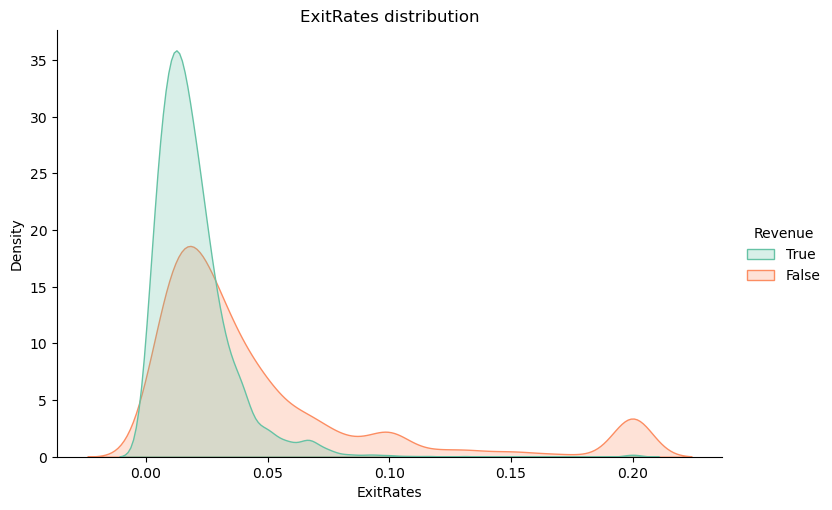

In [10]:
sn.displot(df, x="ExitRates", hue="Revenue", kind="kde", fill=True, 
           hue_order=[True, False], aspect=1.5, common_norm=False, palette="Set2")

plt.title("ExitRates distribution")
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_2940\3244535265.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.pie(df["VisitorType"].value_counts(), labels=df["VisitorType"].unique(), autopct='%1.1f%%', colors=cm.get_cmap("Set3").colors)


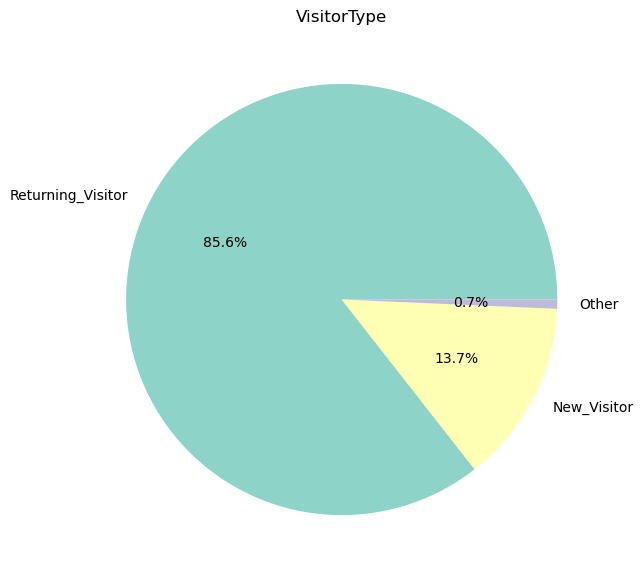

In [11]:
plt.figure(figsize=(7, 7))
plt.pie(df["VisitorType"].value_counts(), labels=df["VisitorType"].unique(), autopct='%1.1f%%', colors=cm.get_cmap("Set3").colors)
plt.title("VisitorType")
plt.show()

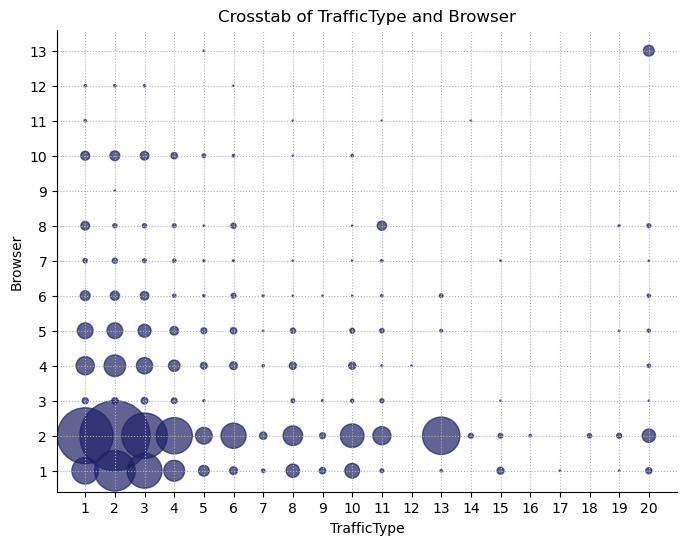

In [12]:
crosstab = pd.crosstab(df.TrafficType, df.Browser).stack().reset_index(name='C')

crosstab.plot.scatter('TrafficType', 'Browser', s=crosstab.C, alpha=0.7, figsize=(8, 6), c="#1e2266")

sn.despine()
plt.xticks(crosstab["TrafficType"].unique())
plt.yticks(crosstab["Browser"].unique())
plt.grid(linestyle="dotted")
plt.title("Crosstab of TrafficType and Browser")
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


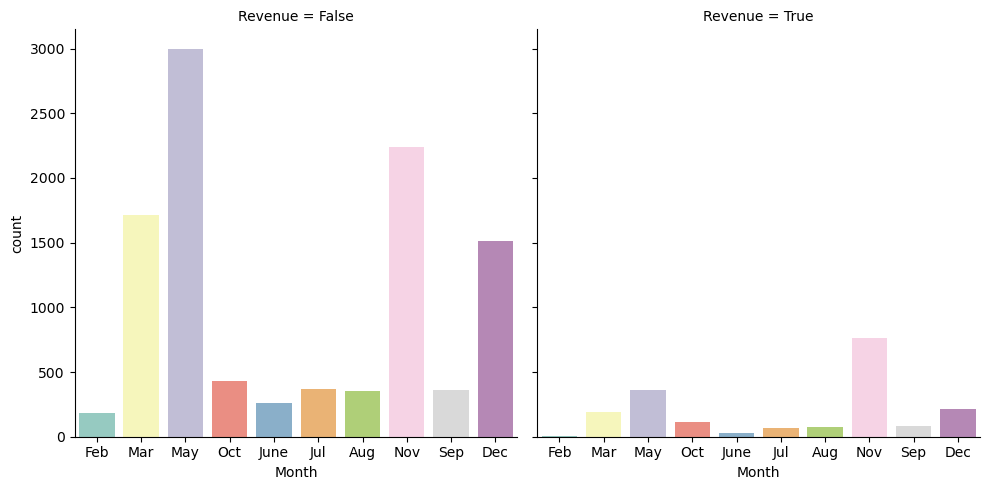

In [13]:
sn.catplot(x="Month", col="Revenue", data=df, kind="count", palette="Set3")
plt.show()

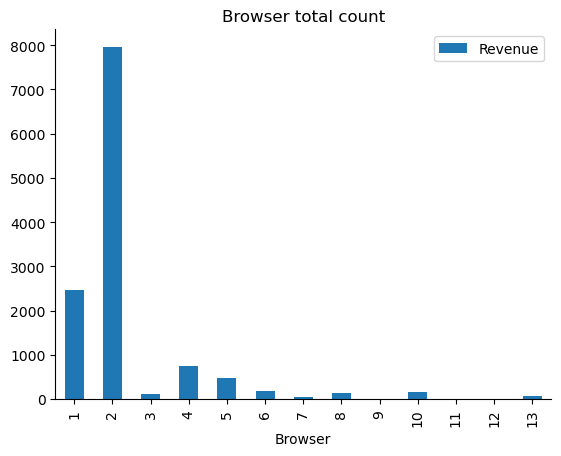

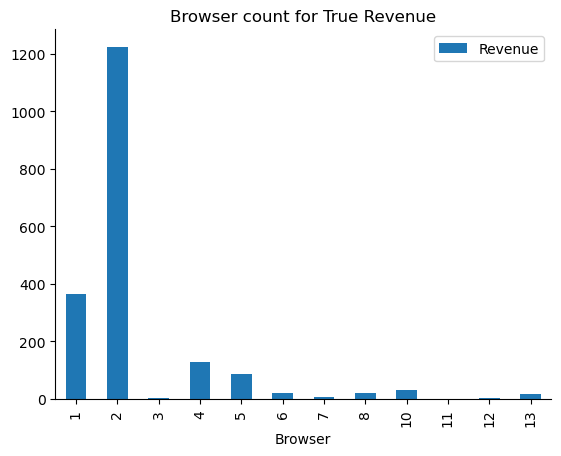

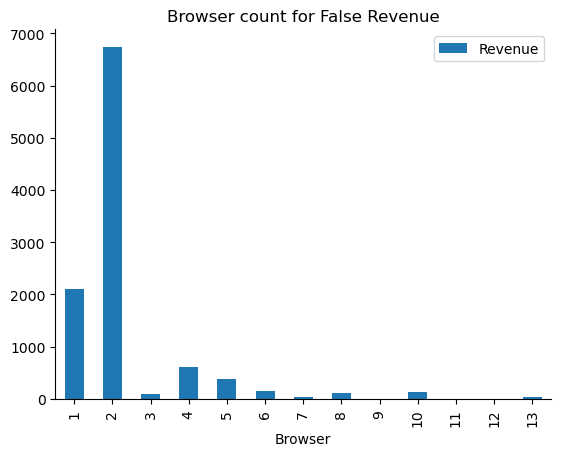

In [14]:
df.groupby("Browser").count().plot(kind="bar", y="Revenue")
plt.title("Browser total count")
sn.despine()
plt.show()

df[df["Revenue"] == True].groupby("Browser").count().plot(kind="bar", y="Revenue")
plt.title("Browser count for True Revenue")
sn.despine()
plt.show()

df[df["Revenue"] == False].groupby("Browser").count().plot(kind="bar", y="Revenue")
plt.title("Browser count for False Revenue")
sn.despine()
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


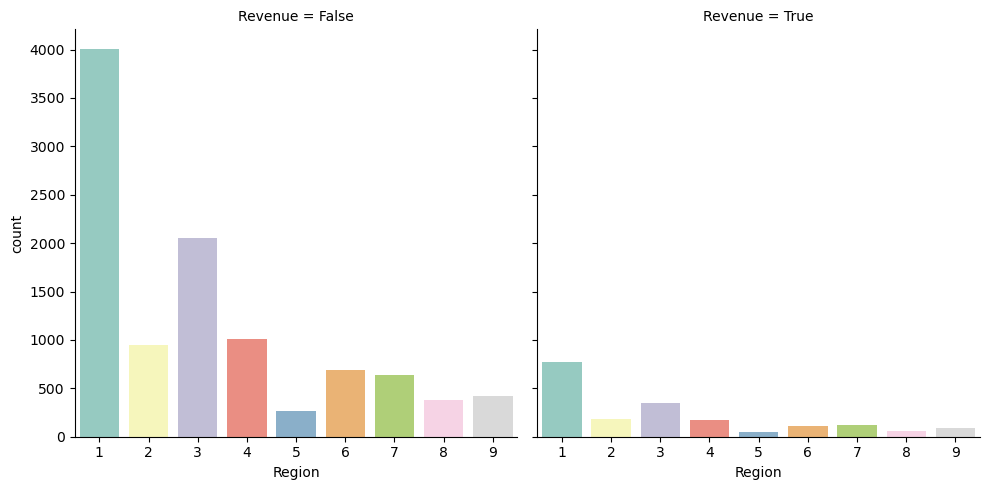

In [15]:
sn.catplot(x="Region", col="Revenue", data=df, kind="count", palette="Set3")

C:\Users\acer\AppData\Local\Temp\ipykernel_2940\2215393783.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sn.stripplot(data=df, x='Revenue', y='BounceRates', palette='autumn')
C:\Users\acer\AppData\Local\Temp\ipykernel_2940\2215393783.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sn.stripplot(data=df, x='Revenue', y='ExitRates', palette='magma')
C:\Users\acer\AppData\Local\Temp\ipykernel_2940\2215393783.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sn.stripplot(data=df, x='Revenue', y='PageValues', palette='pink')


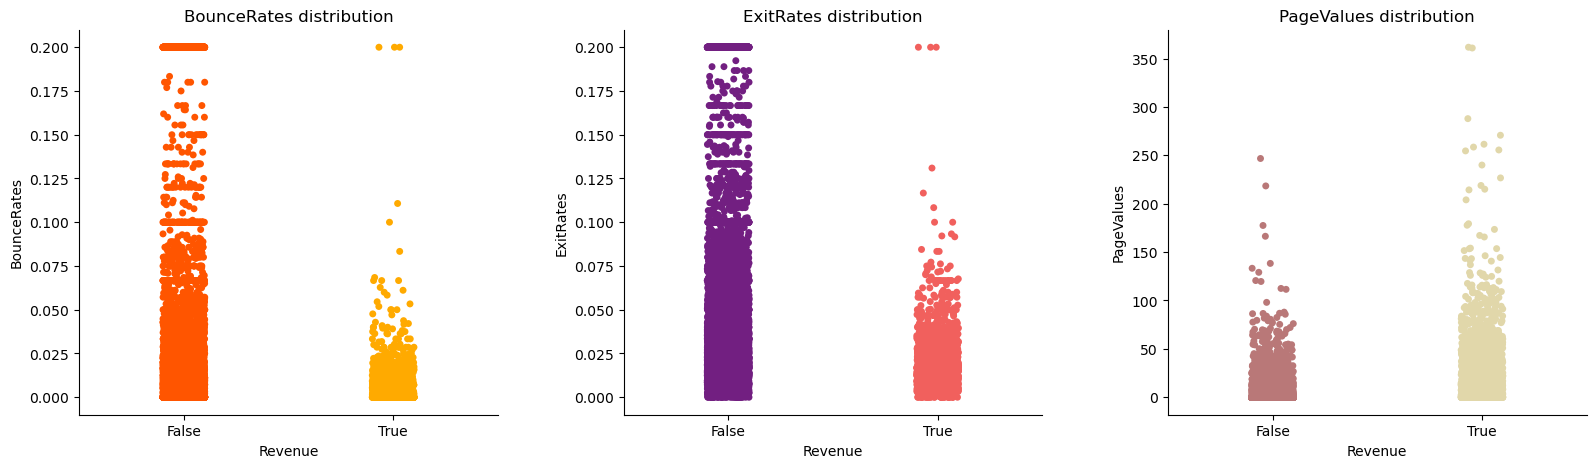

In [16]:
plt.figure(figsize=(9, 5))
plt.subplots_adjust(right=1.8, wspace=0.3)
plt.subplot(1, 3, 1)
sn.stripplot(data=df, x='Revenue', y='BounceRates', palette='autumn')
plt.title('BounceRates distribution')
sn.despine()

plt.subplot(1, 3, 2)
sn.stripplot(data=df, x='Revenue', y='ExitRates', palette='magma')
plt.title('ExitRates distribution')
sn.despine()

plt.subplot(1, 3, 3)
sn.stripplot(data=df, x='Revenue', y='PageValues', palette='pink')
plt.title('PageValues distribution')
sn.despine()

C:\Users\acer\AppData\Local\Temp\ipykernel_2940\2886359744.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


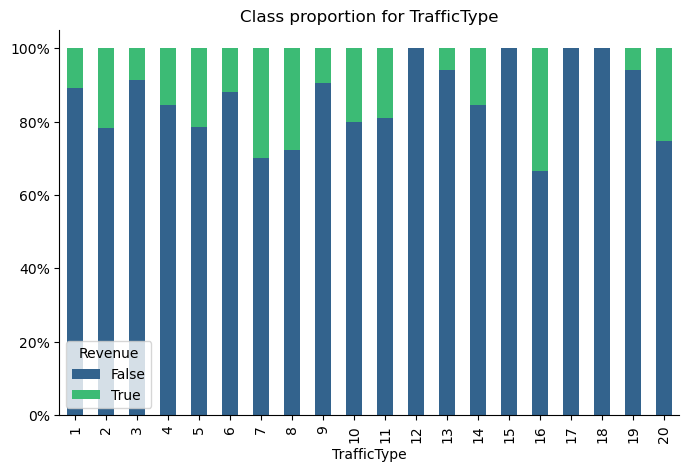

In [17]:
def plot_revenue_proportion(column):

  ct = pd.crosstab(df[column], df['Revenue'])
  ax = ct.div(ct.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(8, 5), color=["#33638DFF", "#3CBB75FF"])
  plt.title('Class proportion for ' + str(column))
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
  sn.despine()
  plt.show()

plot_revenue_proportion("TrafficType")

C:\Users\acer\AppData\Local\Temp\ipykernel_2940\2886359744.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


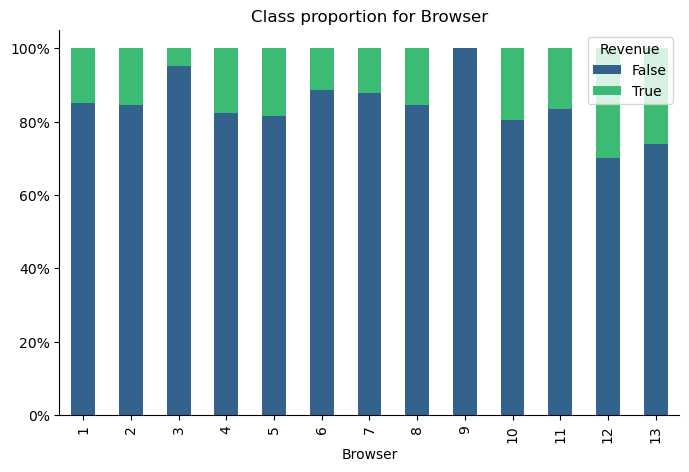

In [18]:
plot_revenue_proportion("Browser")

C:\Users\acer\AppData\Local\Temp\ipykernel_2940\2886359744.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


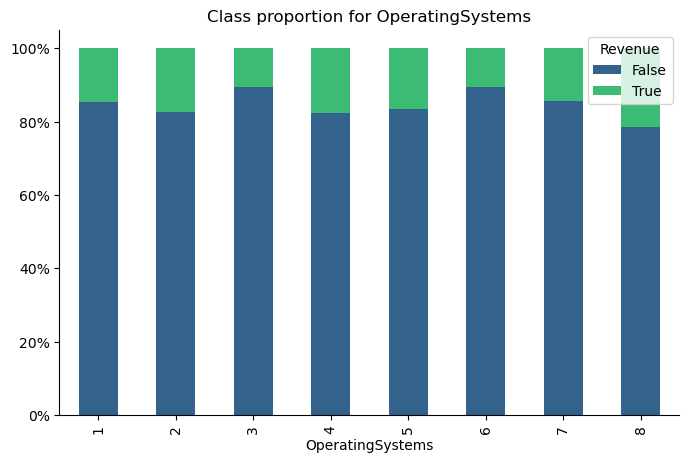

In [19]:
plot_revenue_proportion("OperatingSystems")

C:\Users\acer\AppData\Local\Temp\ipykernel_2940\2886359744.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


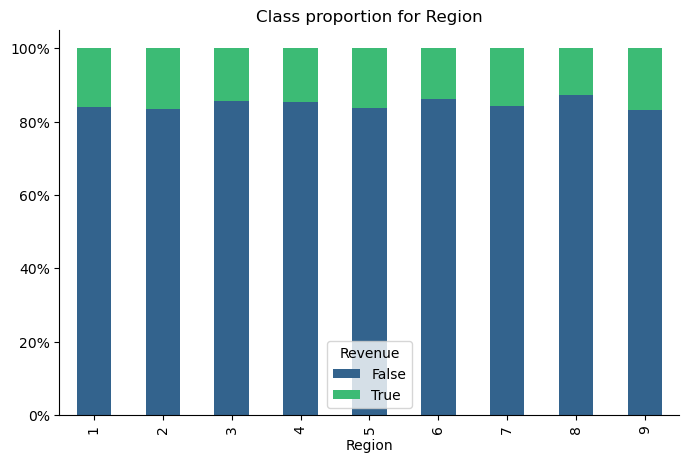

In [20]:
plot_revenue_proportion("Region")

# 4. Classification

## 4.1. Data processing

Now that we have done some visualizations, we can process our DataFrame to format the data in order to apply classification algorithms on it.

We must make a copy of the original DataFrame.

In [21]:
df2 = df.copy()
df2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


We have categorical variables but some of them don't have the right type (int for Browser).

In [22]:
df2.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

We transform the boolean type columns into logical variables (0 or 1).

In [23]:
df2["Weekend"] = df2["Weekend"]. astype(int)
df2["Revenue"] = df2["Revenue"]. astype(int)


Now we change the type of every categorical variable which are not object type yet. Those are "OperatingSystems", "Browser", "Region" and "TrafficType".

"Month" and "VisitorType" are already of object type.

In [24]:
cat_col = ["OperatingSystems", "Browser", "Region", "TrafficType"]

for name in cat_col:
  df2[name] = df2[name].astype(object)

We can now Dummify our DataFrame. 

Dummify a variable consists of One Hot Encoding it. It transforms a categorical variable into an understandable feature for a model. 

If we have a variable named "color" with 3 possible values "green", "blue" and "red", we can't feed a model with this.
One Hot Encoding will transform this variable into 3 variables named "green", "blue", and "red" with 0 or 1 corresponding to the observation color. For example, a "blue" observation will have 1 in the "blue" column and 0 in the "green" and "red" ones. 

pandas.get_dummies() function apply this dummification on each column of type object. That's why we had to change the type of the categorical variables.

In [25]:
df2 = pd.get_dummies(df2)

In [26]:
df2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,False,False,False,False,False,False,False,False,False,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True


Now that we have dummified our DataFrame, we can create our train set and our test set. The stratify parameter means we want an equal distribution of each class in our train set and our test set.

In [27]:
from sklearn.model_selection import train_test_split

x = df2.drop("Revenue", axis=1).values
y = df2["Revenue"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [28]:
print(x.shape, y.shape)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(12330, 74) (12330,)
(9864, 74) (2466, 74) (9864,) (2466,)


In [29]:
print(np.unique(y, return_counts=True))
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([10422,  1908], dtype=int64))
(array([0, 1]), array([8338, 1526], dtype=int64))
(array([0, 1]), array([2084,  382], dtype=int64))


## 4.2. Classification models

Now that we have our train set and our test set, we can use different models for the classification.
We'll use 2 models:

*   A Multi-layer Perceptron
*   Long short-term memory (LSTM) recurrent neural network (RNN)


### 4.2.1. Multi-layer Perceptron

In this part, we'll use Deep Learning for our classification. Neural networks allow us to make robust models and give often good results for every machine learning problems. The disadvantage is that they are difficult to interpret and are called "black box". Also, they are more suited for numeric variables since they can model non-linear relationships.  

We'll define a simple Multi-layer Perceptron with 2 hidden layers of 32 neurons each.

Since it's a binary classification, we'll have a sigmoid in output and we'll compile our model with the binary_crossentropy loss. We use adam as optimizer and we use 10% of our data set as validation set to prevent over-fitting.

In [30]:
from keras.layers import Dense, Flatten, experimental
from keras.models import Sequential

x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

mlp_model = Sequential([
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation='sigmoid')])

mlp_model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
history = mlp_model.fit(x_train, y_train, epochs=50, validation_split=0.1)




Epoch 1/50


278/278 [==============================] - 1s 2ms/step - loss: 1.9500 - accuracy: 0.8251 - val_loss: 0.5222 - val_accuracy: 0.8663
Epoch 2/50
278/278 [==============================] - 0s 1ms/step - loss: 0.9114 - accuracy: 0.8461 - val_loss: 0.6161 - val_accuracy: 0.8845
Epoch 3/50
278/278 [==============================] - 0s 1ms/step - loss: 1.2227 - accuracy: 0.8572 - val_loss: 0.4740 - val_accuracy: 0.8896
Epoch 4/50
278/278 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.8656 - val_loss: 0.5188 - val_accuracy: 0.8815
Epoch 5/50
278/278 [==============================] - 0s 2ms/step - loss: 0.7723 - accuracy: 0.8586 - val_loss: 0.5552 - val_accuracy: 0.8804
Epoch 6/50
278/278 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.8657 - val_loss: 0.3648 - val_accuracy: 0.8875
Epoch 7/50
278/278 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.8605 - val_loss: 0.8438 - val_accuracy: 0.8045
E

In [31]:
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
score = mlp_model.evaluate(x_test, y_test)
print("Test accuracy: %0.4f%%" % (score[1]*100))

78/78 [==============================] - 0s 1ms/step - loss: 0.3055 - accuracy: 0.8897
Test accuracy: 88.9700%


The result seems good, let's print the loss and the accuracy over epochs.

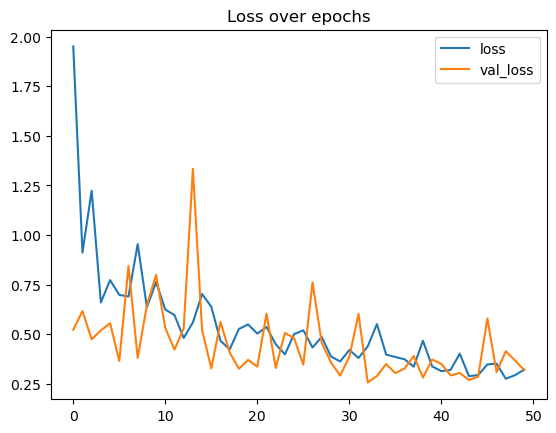

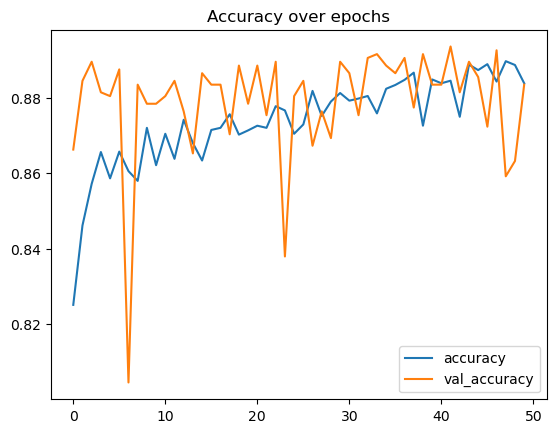

In [32]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss over epochs")
plt.show()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy over epochs")
plt.show()

Multi-layer Perceptron gives accuracy of 88.9700%. Now let's define LSTM RNN with same 32 neurons.

### 4.2.3. Long short-term memory (LSTM) recurrent neural network (RNN)

The Multi-layer Perceptron gave really good results but it's not very interpretable.

For our final model, we'll use a Long short-term memory (LSTM) network is a recurrent neural network (RNN).


In [33]:
from keras.layers import LSTM, Dense
from keras.models import Sequential
import numpy as np

x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

# Reshape your input data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))

# Define LSTM model
lstm_model = Sequential([
    LSTM(32, activation="relu", input_shape=(1, x_train.shape[2])),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
history = lstm_model.fit(x_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
278/278 [==============================] - 2s 3ms/step - loss: 3.6502 - accuracy: 0.7831 - val_loss: 0.5500 - val_accuracy: 0.8774
Epoch 2/50
278/278 [==============================] - 1s 2ms/step - loss: 0.4517 - accuracy: 0.8718 - val_loss: 0.4405 - val_accuracy: 0.8936
Epoch 3/50
278/278 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8809 - val_loss: 0.3839 - val_accuracy: 0.8794
Epoch 4/50
278/278 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8798 - val_loss: 0.6286 - val_accuracy: 0.7862
Epoch 5/50
278/278 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8742 - val_loss: 0.4181 - val_accuracy: 0.8794
Epoch 6/50
278/278 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8768 - val_loss: 0.3915 - val_accuracy: 0.8855
Epoch 7/50
278/278 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8812 - val_loss: 0.3983 - val_accuracy: 0.8632
Epoch 

In [34]:
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
score = lstm_model.evaluate(x_test, y_test)
print("Test accuracy: %0.4f%%" % (score[1]*100))

78/78 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.8804
Test accuracy: 88.0373%


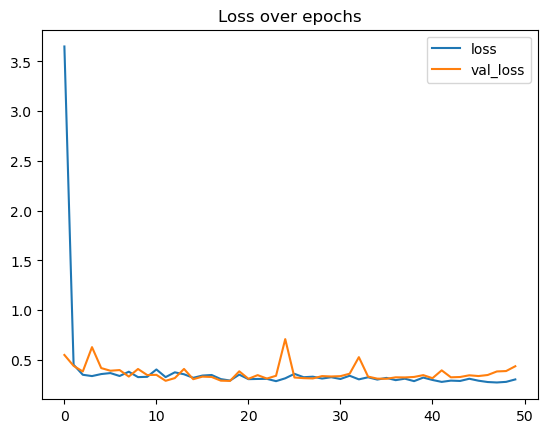

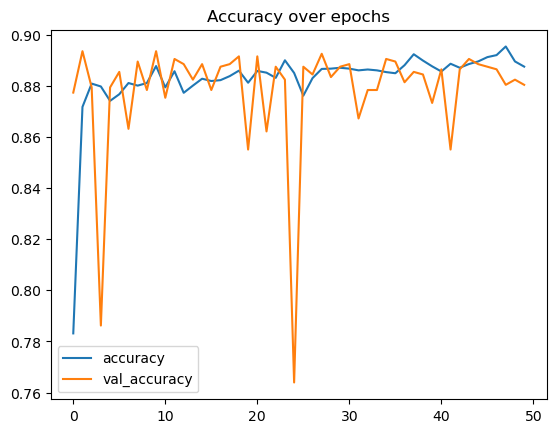

In [35]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss over epochs")
plt.show()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy over epochs")
plt.show()